# Import Libarary

In [ ]:
import os
import zipfile
import gdown # To download googledrive file

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input


# Load Dataset

In [ ]:
# Replace 'your_file_id' with the actual File ID
file_id = '1licscz3rIASm39u_ZDfi4mUBS356yOUc'


# Construct the download link
url = f'https://drive.google.com/uc?id={file_id}'

# Download the file
gdown.download(url, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1licscz3rIASm39u_ZDfi4mUBS356yOUc
To: /content/dataset_fashion_small.zip
100%|██████████| 593M/593M [00:09<00:00, 63.1MB/s]


'dataset_fashion_small.zip'

In [ ]:
# Unzip file
zip_ref = zipfile.ZipFile('dataset_fashion_small.zip', 'r')
zip_ref.extractall()

zip_ref.close()

In [ ]:
!ls

dataset_fashion_small.zip  images  myntradataset  sample_data  styles.csv


# EDA

1. Explore the dataset
2. Mengenal dataset


In [ ]:
# Set Path
DATASET_PATH = '/content/myntradataset'
print(os.listdir(DATASET_PATH))

['images', 'styles.csv']


In [ ]:
# Define to dataframe use Pandas
df = pd.read_csv(DATASET_PATH + "/styles.csv", on_bad_lines='skip')

# Karena ID ini menunjukkan nama image, maka kita buatkan kolom baru
df['image'] = df.apply(lambda row:str(row['id']) + ".jpg", axis=1)

df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg
...,...,...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe,17036.jpg
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop,6461.jpg
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt,18842.jpg
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume,46694.jpg


In [ ]:
# Show off banyak images
print("Banyak Image: ", len(df))

Banyak Image:  44424


In [ ]:
# Show the column data
df.columns

Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName', 'image'],
      dtype='object')

## Clean Dataset

In [ ]:
# Cek Null, or data kosong
df.isnull().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
image                   0
dtype: int64

In [ ]:
# Hapus Data kosong
df = df.dropna()

In [ ]:
# Cek Null, or data kosong
df.isnull().sum()

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
image                 0
dtype: int64

In [ ]:
# Show off banyak images
print("Banyak Image: ", len(df))

Banyak Image:  44077


# Filter Dataset

## Filter masterCategory

In [ ]:
df['masterCategory'].value_counts()

Apparel           21366
Accessories       11244
Footwear           9197
Personal Care      2139
Free Items          105
Sporting Goods       25
Home                  1
Name: masterCategory, dtype: int64

In [ ]:
# Filter yang hanya akan digunakan saja
ind=df[df['masterCategory']=='Accessories'].index
df.drop(ind,inplace=True)

ind=df[df['masterCategory']=='Footwear'].index
df.drop(ind,inplace=True)

ind=df[df['masterCategory']=='Personal Care'].index
df.drop(ind,inplace=True)

ind=df[df['masterCategory']=='Free Items'].index
df.drop(ind,inplace=True)

ind=df[df['masterCategory']=='Sporting Goods'].index
df.drop(ind,inplace=True)

ind=df[df['masterCategory']=='Home'].index
df.drop(ind,inplace=True)


<ipython-input-14-359e49f9933c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(ind,inplace=True)
<ipython-input-14-359e49f9933c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(ind,inplace=True)
<ipython-input-14-359e49f9933c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(ind,inplace=True)
<ipython-input-14-359e49f9933c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

<Axes: >

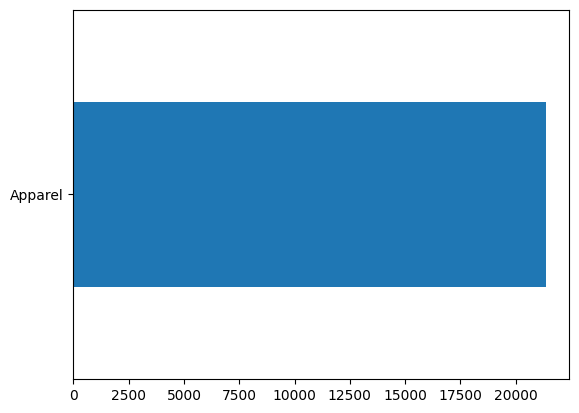

In [ ]:
# Show with visualize
df['masterCategory'].value_counts().plot.barh()

In [ ]:
print(len(df))

21366


## usage (Kebutuhan untuk Kegiatan Khusus)

In [ ]:
df['usage'].value_counts()

Casual          15596
Ethnic           2960
Sports           1594
Formal           1172
Party              22
Smart Casual       21
Travel              1
Name: usage, dtype: int64

In [ ]:
# Drop in column yang tidak akan dipakai
ind=df[df['usage']=='Ethnic'].index
df.drop(ind,inplace=True)

<ipython-input-18-b963589c93bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(ind,inplace=True)


<Axes: >

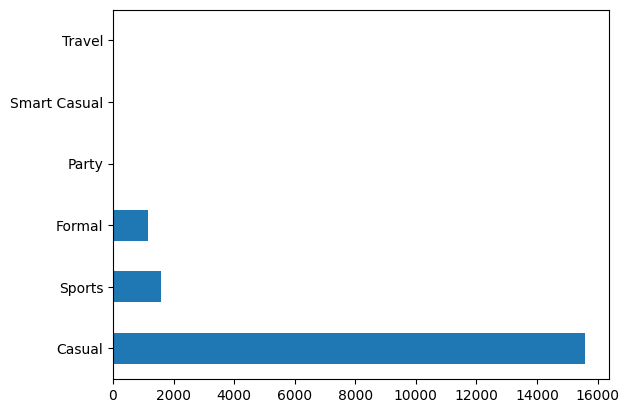

In [ ]:
# Show with visualize
df['usage'].value_counts().plot.barh()

In [ ]:
len(df)

18406

## Filter subCategory

In [ ]:
df['subCategory'].value_counts()

Topwear                     13105
Bottomwear                   2531
Innerwear                    1806
Dress                         478
Loungewear and Nightwear      462
Socks                          12
Apparel Set                    12
Name: subCategory, dtype: int64

In [ ]:
# Hapus Innerwear
ind=df[df['subCategory']=='Innerwear'].index
df.drop(ind,inplace=True)

ind=df[df['subCategory']=='Socks'].index
df.drop(ind,inplace=True)

<ipython-input-22-bff19bcfd8f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(ind,inplace=True)
<ipython-input-22-bff19bcfd8f2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(ind,inplace=True)


In [ ]:
df['subCategory'].value_counts()

Topwear                     13105
Bottomwear                   2531
Dress                         478
Loungewear and Nightwear      462
Apparel Set                    12
Name: subCategory, dtype: int64

## Filter articleType

In [ ]:
len(df)

16588

In [ ]:
df['articleType'].value_counts()

Tshirts           7065
Shirts            3201
Tops              1716
Jeans              603
Shorts             547
Trousers           525
Dresses            464
Track Pants        304
Sweatshirts        285
Sweaters           277
Jackets            257
Tunics             202
Nightdress         188
Capris             173
Leggings           147
Night suits        141
Skirts             117
Lounge Pants        59
Suspenders          40
Jeggings            34
Lounge Shorts       34
Stockings           32
Tracksuits          29
Bath Robe           17
Swimwear            17
Jumpsuit            16
Baby Dolls          14
Waistcoat           14
Rompers             12
Tights               9
Blazers              8
Clothing Set         8
Kurtas               7
Rain Jacket          7
Shrug                6
Robe                 4
Belts                3
Lounge Tshirts       3
Kurtis               2
Suits                1
Name: articleType, dtype: int64

In [ ]:
ind=df[df['articleType']=='Tunics'].index
df.drop(ind,inplace=True)

ind=df[df['articleType']=='Stockings'].index
df.drop(ind,inplace=True)

ind=df[df['articleType']=='Baby Dolls'].index
df.drop(ind,inplace=True)

ind=df[df['articleType']=='Clothing Set'].index
df.drop(ind,inplace=True)

ind=df[df['articleType']=='Belts'].index
df.drop(ind,inplace=True)

ind=df[df['articleType']=='Kurtis'].index
df.drop(ind,inplace=True)
ind=df[df['articleType']=='Suits'].index
df.drop(ind,inplace=True)





<ipython-input-26-ec7de4497d09>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(ind,inplace=True)
<ipython-input-26-ec7de4497d09>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(ind,inplace=True)
<ipython-input-26-ec7de4497d09>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(ind,inplace=True)
<ipython-input-26-ec7de4497d09>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

<Axes: >

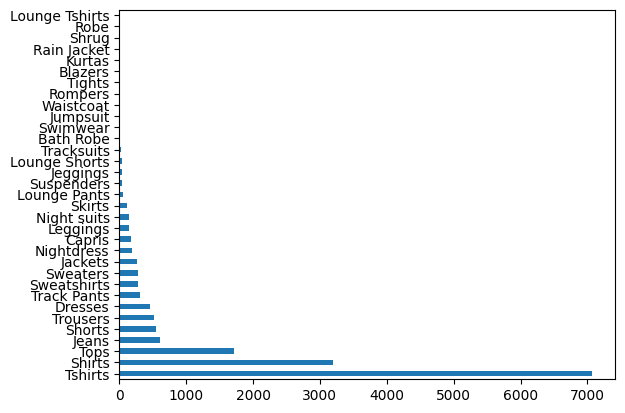

In [ ]:
# Show with visualize
df['articleType'].value_counts().plot.barh()

In [ ]:
df['articleType'].value_counts()

Tshirts           7065
Shirts            3201
Tops              1716
Jeans              603
Shorts             547
Trousers           525
Dresses            464
Track Pants        304
Sweatshirts        285
Sweaters           277
Jackets            257
Nightdress         188
Capris             173
Leggings           147
Night suits        141
Skirts             117
Lounge Pants        59
Suspenders          40
Jeggings            34
Lounge Shorts       34
Tracksuits          29
Bath Robe           17
Swimwear            17
Jumpsuit            16
Waistcoat           14
Rompers             12
Tights               9
Blazers              8
Kurtas               7
Rain Jacket          7
Shrug                6
Robe                 4
Lounge Tshirts       3
Name: articleType, dtype: int64

In [ ]:
len(df['articleType'].value_counts())

33

In [ ]:
# Filter type we will use
type_counts = df['articleType'].value_counts()

indexes = type_counts.index

values = type_counts.values

for i in range(len(type_counts)):

    if values[i] <100:
        break

types_used = indexes[:i]

print('Article types used: ',types_used)

Article types used:  Index(['Tshirts', 'Shirts', 'Tops', 'Jeans', 'Shorts', 'Trousers', 'Dresses',
       'Track Pants', 'Sweatshirts', 'Sweaters', 'Jackets', 'Nightdress',
       'Capris', 'Leggings', 'Night suits', 'Skirts'],
      dtype='object')


In [ ]:
# Implement to the df
df = df[df['articleType'].isin(types_used)]

In [ ]:
len(df['articleType'].value_counts())

16

# Show the image

In [ ]:
len(df)

16010

In [ ]:
df['subCategory'].value_counts()

Topwear                     12803
Bottomwear                   2414
Dress                         462
Loungewear and Nightwear      331
Name: subCategory, dtype: int64

In [ ]:
df=df.sample(frac=0.5)

In [ ]:
df = df[['id', 'masterCategory', 'subCategory', 'articleType', 'usage', 'baseColour']]

In [ ]:
df['image'] = df.apply(lambda row:str(row['id']) + ".jpg", axis=1)
df.head(10)

,id,masterCategory,subCategory,articleType,usage,baseColour,image
18326,55821,Apparel,Loungewear and Nightwear,Night suits,Casual,Grey Melange,55821.jpg
8997,14722,Apparel,Topwear,Shirts,Casual,Black,14722.jpg
20113,6202,Apparel,Topwear,Tshirts,Casual,Beige,6202.jpg
3805,16704,Apparel,Topwear,Tshirts,Casual,Navy Blue,16704.jpg
14144,5101,Apparel,Topwear,Tshirts,Casual,White,5101.jpg
16446,31645,Apparel,Topwear,Shirts,Formal,Purple,31645.jpg
28191,7487,Apparel,Bottomwear,Track Pants,Sports,Black,7487.jpg
5422,19524,Apparel,Topwear,Sweaters,Casual,Blue,19524.jpg
31192,6905,Apparel,Topwear,Tshirts,Casual,Pink,6905.jpg
26009,15910,Apparel,Topwear,Shirts,Formal,Grey,15910.jpg


In [ ]:
df = df.reset_index()

In [ ]:
df.head()

,index,id,masterCategory,subCategory,articleType,usage,baseColour,image
0,18326,55821,Apparel,Loungewear and Nightwear,Night suits,Casual,Grey Melange,55821.jpg
1,8997,14722,Apparel,Topwear,Shirts,Casual,Black,14722.jpg
2,20113,6202,Apparel,Topwear,Tshirts,Casual,Beige,6202.jpg
3,3805,16704,Apparel,Topwear,Tshirts,Casual,Navy Blue,16704.jpg
4,14144,5101,Apparel,Topwear,Tshirts,Casual,White,5101.jpg


In [ ]:
import matplotlib.pyplot as plt
import cv2

def plot_figures(figures, nrows=1, ncols=1, figsize=(8, 8)):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)
    for ind, title in enumerate(figures):
        img, subCategory, articleType = figures[title]
        axeslist.ravel()[ind].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axeslist.ravel()[ind].set_title(f"SubCategory: {subCategory}\nArticleType: {articleType}")
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout()

def img_path(img):
    print(DATASET_PATH + "/images/" + img)
    return DATASET_PATH + "/images/" + img

def load_image(img):
    img_file = img_path(img)

    if os.path.exists(img_file):
        return cv2.imread(img_file)
    else:
        # Return a placeholder or None if the image doesn't exist
        return None


/content/myntradataset/images/53211.jpg
/content/myntradataset/images/34350.jpg
/content/myntradataset/images/2297.jpg
/content/myntradataset/images/2556.jpg
/content/myntradataset/images/19981.jpg
/content/myntradataset/images/27562.jpg


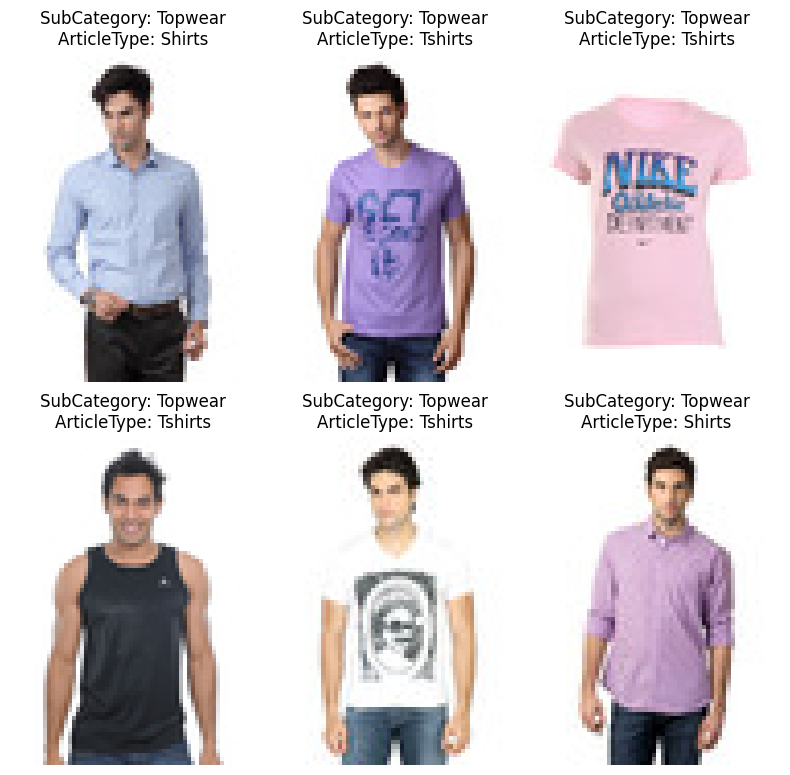

In [ ]:
figures = {}
sampled_rows = df.sample(6)
# sampled_rows = df[df['subCategory'] == 'Bottomwear'].sample(6)

for i, row in sampled_rows.iterrows():
    img = load_image(row.image)

    subCategory = row.subCategory
    # print(subCategory)
    articleType = row.articleType

    figures[f'im{str(i)}'] = (img, subCategory, articleType)

plot_figures(figures, 2, 3)

# Visualize The Column

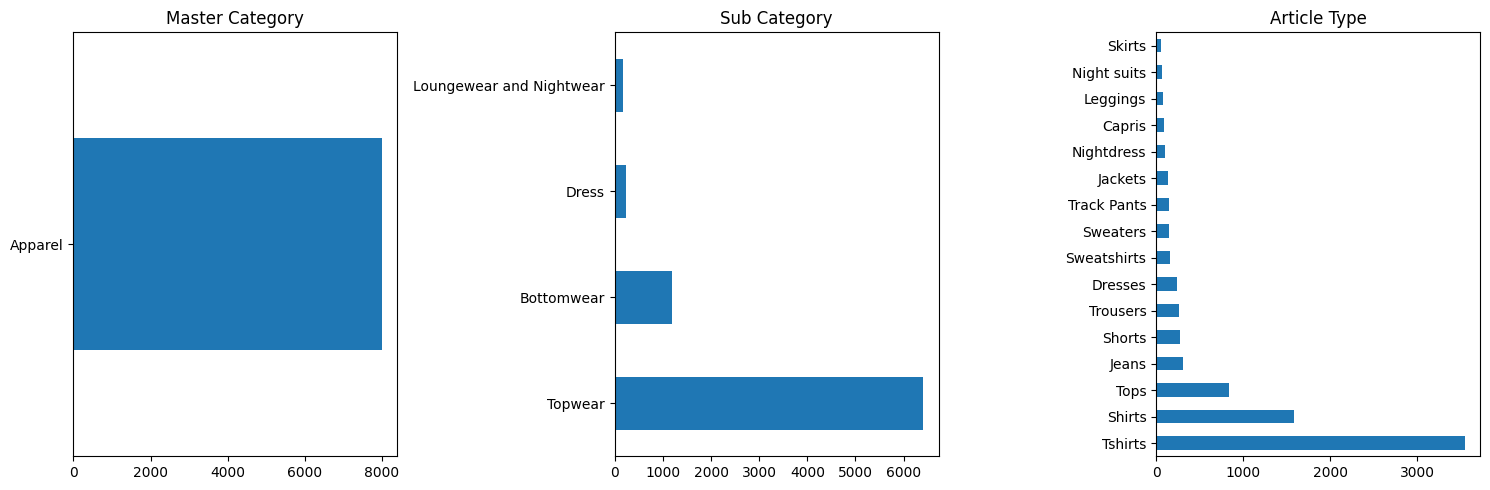

In [ ]:
# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 'masterCategory'
df['masterCategory'].value_counts().plot.barh(ax=axes[0])
axes[0].set_title('Master Category')

# Plot 'subCategory'
df['subCategory'].value_counts().plot.barh(ax=axes[1])
axes[1].set_title('Sub Category')

# Plot 'articleType'
df['articleType'].value_counts().plot.barh(ax=axes[2])
axes[2].set_title('Article Type')

# Plot 'usage'
# df['usage'].value_counts().plot.barh(ax=axes[2])
# axes[2].set_title('usage')

# Adjust layout
plt.tight_layout()
plt.show()

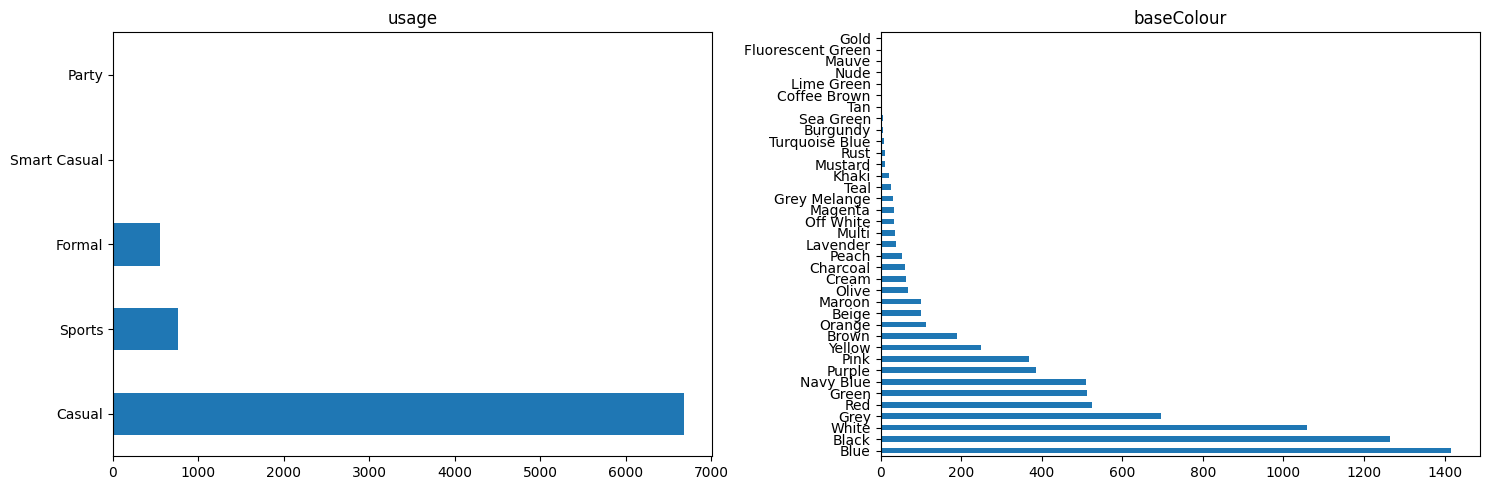

In [ ]:
# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 'usage'
df['usage'].value_counts().plot.barh(ax=axes[0])
axes[0].set_title('usage')

# Plot 'baseColour'
df['baseColour'].value_counts().plot.barh(ax=axes[1])
axes[1].set_title('baseColour')

# Adjust layout
plt.tight_layout()
plt.show()

# Filter the image berdasarkan file csv

In [ ]:
import shutil

# Load dataset from fix_dataset2.csv
df = pd.read_csv('fix_dataset2.csv')



In [ ]:
df

,index,id,masterCategory,subCategory,articleType,usage,baseColour,image
0,37590,5798,Apparel,Topwear,Tshirts,Casual,White,5798.jpg
1,17763,44309,Apparel,Bottomwear,Shorts,Casual,Brown,44309.jpg
2,24098,12503,Apparel,Topwear,Tshirts,Casual,Black,12503.jpg
3,14615,48081,Apparel,Topwear,Tshirts,Casual,Red,48081.jpg
4,33737,22406,Apparel,Topwear,Shirts,Formal,Purple,22406.jpg
...,...,...,...,...,...,...,...,...
8000,28095,57084,Apparel,Bottomwear,Skirts,Casual,Blue,57084.jpg
8001,34702,8474,Apparel,Topwear,Shirts,Casual,Black,8474.jpg
8002,9191,23162,Apparel,Topwear,Tshirts,Casual,Navy Blue,23162.jpg
8003,11588,6116,Apparel,Topwear,Tshirts,Casual,Purple,6116.jpg


In [ ]:
# Create the 'filter_images' folder if it doesn't exist
filter_folder = 'filter_images'
if not os.path.exists(filter_folder):
    os.makedirs(filter_folder)

# Iterate through rows and move images to 'filter_images' folder
for index, row in df.iterrows():
    image_name = row['image']
    source_path = os.path.join(DATASET_PATH + "/images/", image_name)
    destination_path = os.path.join(filter_folder, image_name)

    # Check if the image file exists before moving
    if os.path.exists(source_path):
        shutil.move(source_path, destination_path)

print(f"Filtered images have been moved to the '{filter_folder}' folder.")

# DATASET_PATH + "/images/" + img

Filtered images have been moved to the 'filter_images' folder.


In [ ]:
# Specify the path to the 'filter_images' folder
filter_folder = 'filter_images'

# List the contents of the 'filter_images' folder
filtered_images = os.listdir(filter_folder)

# Get the number of filtered images
num_filtered_images = len(filtered_images)

# Print the number of filtered images
print(f"Number of Filtered Images: {num_filtered_images}")

Number of Filtered Images: 8003


In [ ]:
len(df)

8005

In [ ]:
df.isnull().sum()

index             0
id                0
masterCategory    0
subCategory       0
articleType       0
usage             0
baseColour        0
image             0
dtype: int64

In [ ]:
import os

# Specify the path to the 'filter_images' folder
filter_folder = 'filter_images'

# List the contents of the 'filter_images' folder
filtered_images = os.listdir(filter_folder)

# Get the unique image names from the DataFrame
unique_image_names_df = df['image'].unique()

# Identify missing or extra images
missing_images = set(unique_image_names_df) - set(filtered_images)
extra_images = set(filtered_images) - set(unique_image_names_df)

# Print the results
print(f"Number of Filtered Images: {len(filtered_images)}")
print(f"Length of DataFrame: {len(df)}")
print(f"Missing Images: {len(missing_images)}")
print(f"Extra Images: {len(extra_images)}")


Number of Filtered Images: 8003
Length of DataFrame: 8005
Missing Images: 2
Extra Images: 0


In [ ]:
# Identify missing images
missing_images_set = set(unique_image_names_df) - set(filtered_images)

# Remove rows with missing images from the DataFrame
df_filtered = df[~df['image'].isin(missing_images_set)]

# Display the updated DataFrame
print("Updated DataFrame:")
print(df_filtered.head())

# Print the number of rows in the updated DataFrame
print(f"Number of Rows in Updated DataFrame: {len(df_filtered)}")


Updated DataFrame:
   index     id masterCategory subCategory articleType   usage baseColour  \
0  37590   5798        Apparel     Topwear     Tshirts  Casual      White   
1  17763  44309        Apparel  Bottomwear      Shorts  Casual      Brown   
2  24098  12503        Apparel     Topwear     Tshirts  Casual      Black   
3  14615  48081        Apparel     Topwear     Tshirts  Casual        Red   
4  33737  22406        Apparel     Topwear      Shirts  Formal     Purple   

       image  
0   5798.jpg  
1  44309.jpg  
2  12503.jpg  
3  48081.jpg  
4  22406.jpg  
Number of Rows in Updated DataFrame: 8003


In [ ]:
df = df_filtered

In [ ]:
import os

# Specify the path to the 'filter_images' folder
filter_folder = 'filter_images'

# List the contents of the 'filter_images' folder
filtered_images = os.listdir(filter_folder)

# Get the unique image names from the DataFrame
unique_image_names_df = df['image'].unique()

# Identify missing or extra images
missing_images = set(unique_image_names_df) - set(filtered_images)
extra_images = set(filtered_images) - set(unique_image_names_df)

# Print the results
print(f"Number of Filtered Images: {len(filtered_images)}")
print(f"Length of DataFrame: {len(df)}")
print(f"Missing Images: {len(missing_images)}")
print(f"Extra Images: {len(extra_images)}")


Number of Filtered Images: 8003
Length of DataFrame: 8003
Missing Images: 0
Extra Images: 0


# Save to CSV File

In [ ]:
# from google.colab import drive

# # Mount Google Drive
# drive.mount('/content/drive')

# # Simpan DataFrame ke Google Drive
# nama_file = "/content/drive/My Drive/fix_dataset2.csv"
# df.to_csv(nama_file, index=False)

Mounted at /content/drive


In [ ]:
# Simpan DataFrame sebagai file CSV lokal
nama_file_lokal = "fashionDataset.csv"
df.to_csv(nama_file_lokal, index=False)

# Unduh file CSV
from google.colab import files
files.download(nama_file_lokal)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
len(df)

8005

In [ ]:
# Make zip filter_images
# Specify the path to the 'filter_images' folder
filter_folder = 'filter_images'

# Specify the name for the zip file
zip_file_name = 'filter_images.zip'

# Create a zip file of the 'filter_images' folder
shutil.make_archive(zip_file_name, 'zip', filter_folder)

# Move the zip file to '/content/drive/My Drive/' (you can change the destination)
shutil.move(zip_file_name + '.zip', '/content/drive/My Drive/' + zip_file_name)

'/content/drive/My Drive/filter_images.zip'